## Email span detection using Convolutional Neural Networks(CNN) with Sequential API 


# 1. Simple CNN Model


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam



Load the Dataset: Load the dataset from the CSV file into a Pandas DataFrame.

In [6]:

# Step 1: Load the dataset
data = pd.read_csv('test_data.csv')

Preprocess the Data: Encode the 'Category' column to numerical labels using LabelEncoder. Split the dataset into training and testing sets using train_test_split.

In [3]:

# Step 2: Preprocess the data
# Encode the 'Category' column to numerical labels

#This line initializes a new instance of the LabelEncoder class. LabelEncoder is a utility class in scikit-learn that converts categorical labels into numerical labels.
label_encoder = LabelEncoder()


#This line applies the fit_transform method of the LabelEncoder object to the 'Category' column of your dataset (data['Category']).
#fit_transform fits the encoder to the unique labels in the 'Category' column and transforms them into numerical labels.
#The transformed numerical labels are then assigned back to the 'Category' column in the data DataFrame.
data['Category'] = label_encoder.fit_transform(data['Category'])


In [10]:
#The 'Category' column in your DataFrame will contain numerical labels instead of the original categorical labels. These numerical labels can be used directly as target values for training machine learning models.
#data['Category']


In [5]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['Category'], test_size=0.2, random_state=42)


Tokenize the Text Data: Use Tokenizer from Keras to tokenize the text data.

In [6]:
# Step 3: Tokenize the text data
max_words = 1000 # max_words is a variable that determines the maximum number of unique words to be considered in the tokenizer. In this case, it's set to 1000, meaning only the top 1000 most frequent words will be considered.

tokenizer = Tokenizer(num_words=max_words) #Tokenizer is a class from the Keras library used for tokenizing text data.
#num_words is a parameter that specifies the maximum number of words to keep, based on word frequency. Words outside this limit will be ignored. Here, it's set to max_words, so only the top 1000 most frequent words will be kept.

tokenizer.fit_on_texts(X_train)
#This line fits the tokenizer on the training text data (X_train).
#It updates the internal vocabulary based on the text data and assigns a unique index to each word in the vocabulary.
#After this step, the tokenizer is ready to convert text data into sequences of numerical indices based on the fitted vocabulary.

In [7]:

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
#It produces a list of sequences, where each sequence represents a text in the testing set as a sequence of numerical indices.

#X_train_seq and X_test_seq will contain the text data from the training and testing sets, respectively, represented as sequences of numerical indices based on the vocabulary learned by the tokenizer.

Pad Sequences: Pad the sequences to ensure uniform length using pad_sequences.


In [8]:

# Step 4: Pad sequences to ensure uniform length
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

Build the CNN Model: Create a Sequential model with Embedding layer, Conv1D layer, GlobalMaxPooling1D layer, Dense layers, and Dropout layer.

In [1]:
#Sequential?

In [2]:
#Dense?

In [11]:
# Step 5: Build the CNN model
embedding_dim = 50
num_filters = 64
filter_size = 5


#This code defines a Convolutional Neural Network (CNN) model using the Keras Sequential API

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),  #layer 1
    Conv1D(filters=num_filters, kernel_size=filter_size, padding='same', activation='relu'),   #layer 2
    GlobalMaxPooling1D(), 
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


#The Embedding layer is responsible for converting sequences of integers (word indices) into dense vectors of fixed size.
    #Embedding Layer is a component in deep learning models that is used to represent categorical or discrete data as continuous vectors.
    #input_dim specifies the size of the vocabulary, i.e., the maximum integer index + 1.
    #output_dim specifies the dimension of the dense embedding.
    #input_length specifies the length of input sequences (in this case, max_len).

#Conv1D is a one-dimensional convolutional layer. It applies convolution operation over one spatial dimension (usually time for text data).
    #filters is the number of filters (or kernels) in the convolutional layer.
    #kernel_size specifies the length of the 1D convolution window.
    #activation='relu' applies the Rectified Linear Unit (ReLU) activation function to introduce non-linearity.


#GlobalMaxPooling1D layer performs max pooling operation across the entire sequence, retaining the maximum value from each feature map.
    #It reduces the spatial dimensions of the feature maps to a single vector by taking the maximum value along each feature dimension.

#Dense layer is a fully connected layer where every neuron is connected to every neuron in the previous layer.
    #256 is the number of neurons in the layer.
    #activation='relu' applies the ReLU activation function.

#Dropout layer is a regularization technique that randomly sets a fraction of input units to zero during training to prevent overfitting.
    #0.5 specifies the dropout rate, i.e., 50% of the input units will be randomly dropped during training.
    #model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Dense layer with a single neuron and a sigmoid activation function.
    #The sigmoid activation function squashes the output between 0 and 1, making it suitable for binary classification tasks.



c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Train the Model: Compile and train the model on the training data using the specified optimizer, loss function, batch size, and number of epochs.

In [48]:
# Step 6: Train the model
 # Compile the model with the specified learning rate
optimizer = Adam()
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

batch_size = 64
#batch_size determines the number of samples per gradient update during training. In each iteration, the model will process and update weights based on 64 samples.

epochs = 5
#epochs specifies the number of epochs (iterations over the entire dataset) for training the model. Here, the model will be trained for 5 epochs.

history = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_pad, y_test))

#model.fit is a method that trains the model on the given training data.
    #X_train_pad is the preprocessed training text data.
    #y_train is the corresponding labels for the training data.
    #validation_data=(X_test_pad, y_test) specifies the validation data to evaluate the model's performance after each epoch. Here, X_test_pad is the preprocessed testing text data, and y_test is the corresponding labels for the testing data.
    #During training, the model will be optimized using the specified optimizer, and the loss function specified during model compilation (binary_crossentropy in this case).
    #The training progress and performance metrics (loss and accuracy) will be stored in the history object for later visualization and analysis.

Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9882 - loss: 0.0372 - val_accuracy: 0.9892 - val_loss: 0.0431
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9960 - loss: 0.0202 - val_accuracy: 0.9883 - val_loss: 0.0475
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9963 - loss: 0.0155 - val_accuracy: 0.9883 - val_loss: 0.0438
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9974 - loss: 0.0096 - val_accuracy: 0.9901 - val_loss: 0.0449
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9991 - loss: 0.0041 - val_accuracy: 0.9883 - val_loss: 0.0493


## Predict Single Input

In [20]:
# Example of spam or ham prediction
def predict_spam_or_ham(message):
    # Tokenize and pad the input message
    message_seq = tokenizer.texts_to_sequences([message])
    message_pad = pad_sequences(message_seq, maxlen=max_len)
    
    # Make predictions
    prediction = model.predict(message_pad)
    
    print(prediction)
    # Convert prediction to label (0 for ham, 1 for spam)
    label = "spam" if prediction[0][0] > 0.5 else "ham"
    
    return label


In [21]:

# Example message
example_message = "Congratulations! You've won a free trip to Hawaii. Claim your prize now!"

# Predict if the message is spam or ham
prediction = predict_spam_or_ham(example_message)
print("Predicted Label:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
[[0.9996732]]
Predicted Label: spam


In [22]:

# Example message
example_message = "This email provides relevant information about an upcoming programming workshop and encourages the recipient to RSVP if interested. It does not contain any elements typically associated with spam, such as unsolicited offers, suspicious links, or irrelevant content."

# Predict if the message is spam or ham
prediction = predict_spam_or_ham(example_message)
print("Predicted Label:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[0.3697101]]
Predicted Label: ham


# Performance Analysis

## Model Evaluation

1. **Accuracy**: Measure the overall accuracy of the model on the test dataset.


In [17]:

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test Accuracy:", accuracy)

2. **Precision**: Evaluate how many of the predicted positives are actual positives.


In [8]:

from sklearn.metrics import precision_score

In [25]:

# Predict probabilities ( the output is in probability, bacuse we use a sigmoid activation function in the final layer of your neural network, which outputs probabilities between 0 and 1.)
y_pred_prob = model.predict(X_test_pad)


#note that common threshold value is 0.5
# Convert probabilities to binary class labels
y_pred = (y_pred_prob > 0.5).astype(int)


# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Precision: 0.97


3. **Recall**: Determine how many of the actual positives are correctly identified by the model.


In [26]:
from sklearn.metrics import recall_score


In [27]:

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

Recall: 0.93


4. **F1 Score**: Calculate the harmonic mean of precision and recall to get a single performance metric.


In [28]:
from sklearn.metrics import f1_score


In [30]:

# Assuming y_true and y_pred are the true labels and predicted labels, respectively
# Calculate F1 score
f1 = f1_score(y_pred, y_pred)

print(f'F1 Score: {f1:.2f}')

F1 Score: 1.00


5. **Confusion Matrix**: Analyze the confusion matrix to understand the true positives, false positives, true negatives, and false negatives.


In [32]:
from sklearn.metrics import confusion_matrix


In [33]:

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[961   5]
 [ 10 139]]


plot confusion matrix

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

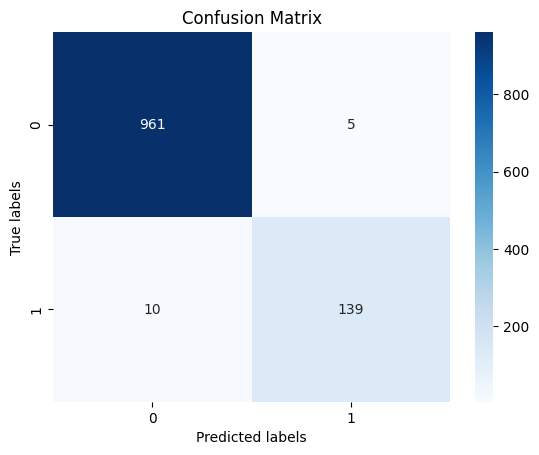

In [36]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## Resource Utilization


1. **Training Time**: Measure the time taken to train the model.

In [38]:
import time

In [39]:

# Measure the training time
start_time = time.time()

# Train the model
history = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_pad, y_test))

end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9985 - loss: 0.0062 - val_accuracy: 0.9865 - val_loss: 0.0563
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9989 - loss: 0.0048 - val_accuracy: 0.9865 - val_loss: 0.0624
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9992 - loss: 0.0044 - val_accuracy: 0.9865 - val_loss: 0.0646
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9996 - loss: 0.0019 - val_accuracy: 0.9874 - val_loss: 0.0694
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9999 - loss: 0.0012 - val_accuracy: 0.9874 - val_loss: 0.0713
Training time: 6.16 seconds


2. **Inference Time**: Check the time taken for the model to make predictions.


In [41]:

# Measure inference time
start_time = time.time()
y_pred_prob = model.predict(X_test_pad)
end_time = time.time()
inference_time = end_time - start_time
print(f'Inference Time: {inference_time:.4f} seconds')


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Inference Time: 0.3549 seconds



## Hyperparameter Tuning


1. **Learning Rate**: Optimize and analyze the effect of different learning rates.

In [51]:

#This line initializes a new instance of the LabelEncoder class. LabelEncoder is a utility class in scikit-learn that converts categorical labels into numerical labels.
label_encoder = LabelEncoder()
#The transformed numerical labels are then assigned back to the 'Category' column in the data DataFrame.
data['Category'] = label_encoder.fit_transform(data['Category'])
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['Category'], test_size=0.2, random_state=42)
# Step 3: Tokenize the text data
max_words = 1000 # max_words is a variable that determines the maximum number of unique words to be considered in the tokenizer. In this case, it's set to 1000, meaning only the top 1000 most frequent words will be considered.

tokenizer = Tokenizer(num_words=max_words) #Tokenizer is a class from the Keras library used for tokenizing text data.
#num_words is a parameter that specifies the maximum number of words to keep, based on word frequency. Words outside this limit will be ignored. Here, it's set to max_words, so only the top 1000 most frequent words will be kept.

tokenizer.fit_on_texts(X_train)
# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


# Step 4: Pad sequences to ensure uniform length
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


# Step 5: Build the CNN model
embedding_dim = 50
num_filters = 64
filter_size = 5

# Define a list of learning rates to experiment with
learning_rates = [0.001, 0.01, 0.1, 0.3]

# Train models with different learning rates and evaluate their performance
for lr in learning_rates:
    #This code defines a Convolutional Neural Network (CNN) model using the Keras Sequential API
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),  #layer 1
        Conv1D(filters=num_filters, kernel_size=filter_size, padding='same', activation='relu'),   #layer 2
        GlobalMaxPooling1D(), 
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])


    # Compile the model with the specified learning rate
    optimizer = Adam(learning_rate=lr)
    
    # Step 6: Train the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        
    epochs = 5
    #epochs specifies the number of epochs (iterations over the entire dataset) for training the model. Here, the model will be trained for 5 epochs.

    history = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_pad, y_test))

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=0)
    y_pred_prob = model.predict(X_test_pad)
    y_pred = (y_pred_prob > 0.5).astype(int)
    precision = precision_score(y_test, y_pred)
    
    print(f"Test Accuracy with learning rate {lr}: {accuracy:.4f}")
    print(f"Precision with learning rate {lr}: {precision:.4f}")
    print("-----------------------------------")

    

Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8649 - loss: 0.4744 - val_accuracy: 0.8664 - val_loss: 0.3028
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8941 - loss: 0.2250 - val_accuracy: 0.9857 - val_loss: 0.0654
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9885 - loss: 0.0465 - val_accuracy: 0.9874 - val_loss: 0.0491
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9950 - loss: 0.0215 - val_accuracy: 0.9865 - val_loss: 0.0501
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9970 - loss: 0.0134 - val_accuracy: 0.9883 - val_loss: 0.0495
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Test Accuracy with learning rate 0.001: 0.9883
Precision with learning rate 0.001: 0.9658
-----------------------------------
Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8317 - loss: 0.4988 - val_accuracy: 0.8664 - val_loss: 0.2824
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9070 - loss: 0.2084 - val_accuracy: 0.9883 - val_loss: 0.0575
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9889 - loss: 0.0356 - val_accuracy: 0.9892 - val_loss: 0.0478
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9939 - loss: 0.0273 - val_accuracy: 0.9883 - val_loss: 0.0462
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9969 - loss: 0.0137 - val_accuracy: 0.9883 - val_loss: 0.0493
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Test Accuracy with learning rate 0.01: 0.9883
Precision with learning rate 0.01: 0.9722
-----------------------------------
Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8328 - loss: 0.4990 - val_accuracy: 0.8664 - val_loss: 0.2881
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8934 - loss: 0.2232 - val_accuracy: 0.9865 - val_loss: 0.0571
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9892 - loss: 0.0435 - val_accuracy: 0.9865 - val_loss: 0.0525
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9942 - loss: 0.0252 - val_accuracy: 0.9874 - val_loss: 0.0451
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9977 - loss: 0.0128 - val_accuracy: 0.9865 - val_loss: 0.0519
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Test Accuracy with learning rate 0.1: 0.9865
Precision with learning rate 0.1: 0.9718
-----------------------------------
Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8477 - loss: 0.4854 - val_accuracy: 0.8664 - val_loss: 0.2953
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8801 - loss: 0.2503 - val_accuracy: 0.9812 - val_loss: 0.0765
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9845 - loss: 0.0510 - val_accuracy: 0.9892 - val_loss: 0.0549
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9926 - loss: 0.0257 - val_accuracy: 0.9865 - val_loss: 0.0516
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9970 - loss: 0.0159 - val_accuracy: 0.9865 - val_loss: 0.0515
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Test Accuracy with learning rate 0.3: 0.9865
Precision with learning rate 0.3: 0.9589
-----------------------------------


2. **Batch Size**: Experiment with different batch sizes to find the optimal one.
    

In [43]:
#Note: added the above implementation together into single unit, and exicuted it with different batch_size

#This line initializes a new instance of the LabelEncoder class. LabelEncoder is a utility class in scikit-learn that converts categorical labels into numerical labels.
label_encoder = LabelEncoder()
#The transformed numerical labels are then assigned back to the 'Category' column in the data DataFrame.
data['Category'] = label_encoder.fit_transform(data['Category'])
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['Category'], test_size=0.2, random_state=42)
# Step 3: Tokenize the text data
max_words = 1000 # max_words is a variable that determines the maximum number of unique words to be considered in the tokenizer. In this case, it's set to 1000, meaning only the top 1000 most frequent words will be considered.

tokenizer = Tokenizer(num_words=max_words) #Tokenizer is a class from the Keras library used for tokenizing text data.
#num_words is a parameter that specifies the maximum number of words to keep, based on word frequency. Words outside this limit will be ignored. Here, it's set to max_words, so only the top 1000 most frequent words will be kept.

tokenizer.fit_on_texts(X_train)
# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


# Step 4: Pad sequences to ensure uniform length
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


# Step 5: Build the CNN model
embedding_dim = 50
num_filters = 64
filter_size = 5


# Experiment with different batch sizes
batch_sizes = [16, 32, 64, 128]
#batch_size determines the number of samples per gradient update during training. In each iteration, the model will process and update weights based on 64 samples.
for batch_size in batch_sizes:
    #This code defines a Convolutional Neural Network (CNN) model using the Keras Sequential API
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),  #layer 1
        Conv1D(filters=num_filters, kernel_size=filter_size, padding='same', activation='relu'),   #layer 2
        GlobalMaxPooling1D(), 
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    # Step 6: Train the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        
    epochs = 5
    #epochs specifies the number of epochs (iterations over the entire dataset) for training the model. Here, the model will be trained for 5 epochs.

    history = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_pad, y_test))

    # Predict probabilities
    y_pred_prob = model.predict(X_test_pad)

    # Convert probabilities to binary class labels
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Calculate precision
    precision = precision_score(y_test, y_pred)
    print(f'Precision with batch size {batch_size}: {precision:.2f}')

    

Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


279/279 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8818 - loss: 0.3751 - val_accuracy: 0.9812 - val_loss: 0.0658
Epoch 2/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9862 - loss: 0.0497 - val_accuracy: 0.9874 - val_loss: 0.0515
Epoch 3/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9944 - loss: 0.0217 - val_accuracy: 0.9857 - val_loss: 0.0536
Epoch 4/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9988 - loss: 0.0069 - val_accuracy: 0.9883 - val_loss: 0.0595
Epoch 5/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9993 - loss: 0.0033 - val_accuracy: 0.9874 - val_loss: 0.0629
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Precision with batch size 16: 0.97
Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8570 - loss: 0.4385 - val_accuracy: 0.9695 - val_loss: 0.1188
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9809 - loss: 0.0830 - val_accuracy: 0.9892 - val_loss: 0.0500
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9931 - loss: 0.0347 - val_accuracy: 0.9857 - val_loss: 0.0467
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9967 - loss: 0.0133 - val_accuracy: 0.9821 - val_loss: 0.0528
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9979 - loss: 0.0107 - val_accuracy: 0.9857 - val_loss: 0.0548
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Precision with batch size 32: 0.96
Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8632 - loss: 0.4769 - val_accuracy: 0.8664 - val_loss: 0.2720
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8807 - loss: 0.2309 - val_accuracy: 0.9794 - val_loss: 0.0834
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9877 - loss: 0.0571 - val_accuracy: 0.9865 - val_loss: 0.0531
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9937 - loss: 0.0274 - val_accuracy: 0.9874 - val_loss: 0.0510
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9963 - loss: 0.0131 - val_accuracy: 0.9883 - val_loss: 0.0526
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Precision with batch size 64: 0.97
Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.8361 - loss: 0.5292 - val_accuracy: 0.8664 - val_loss: 0.3683
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8663 - loss: 0.3432 - val_accuracy: 0.8664 - val_loss: 0.2293
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9078 - loss: 0.1820 - val_accuracy: 0.9848 - val_loss: 0.0729
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9877 - loss: 0.0506 - val_accuracy: 0.9892 - val_loss: 0.0518
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9930 - loss: 0.0304 - val_accuracy: 0.9883 - val_loss: 0.0477
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Precision with batch size 128: 0.97


3. **Optimizer Choice**: Compare the performance of different optimizers (SGD, Adam, RMSprop, etc.).


In [44]:
#import different optimizers
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

In [46]:

#This line initializes a new instance of the LabelEncoder class. LabelEncoder is a utility class in scikit-learn that converts categorical labels into numerical labels.
label_encoder = LabelEncoder()
#The transformed numerical labels are then assigned back to the 'Category' column in the data DataFrame.
data['Category'] = label_encoder.fit_transform(data['Category'])
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['Category'], test_size=0.2, random_state=42)
# Step 3: Tokenize the text data
max_words = 1000 # max_words is a variable that determines the maximum number of unique words to be considered in the tokenizer. In this case, it's set to 1000, meaning only the top 1000 most frequent words will be considered.

tokenizer = Tokenizer(num_words=max_words) #Tokenizer is a class from the Keras library used for tokenizing text data.
#num_words is a parameter that specifies the maximum number of words to keep, based on word frequency. Words outside this limit will be ignored. Here, it's set to max_words, so only the top 1000 most frequent words will be kept.

tokenizer.fit_on_texts(X_train)
# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


# Step 4: Pad sequences to ensure uniform length
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


# Step 5: Build the CNN model
embedding_dim = 50
num_filters = 64
filter_size = 5


# Define a list of optimizers to compare
optimizers = [SGD(), Adam(), RMSprop()]

# Iterate over each optimizer
for optimizer in optimizers:
    #This code defines a Convolutional Neural Network (CNN) model using the Keras Sequential API
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),  #layer 1
        Conv1D(filters=num_filters, kernel_size=filter_size, padding='same', activation='relu'),   #layer 2
        GlobalMaxPooling1D(), 
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    # Step 6: Train the model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

        
    epochs = 5
    #epochs specifies the number of epochs (iterations over the entire dataset) for training the model. Here, the model will be trained for 5 epochs.

    history = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_pad, y_test))

    # Predict probabilities
    y_pred_prob = model.predict(X_test_pad)

    # Convert probabilities to binary class labels
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Calculate precision
    precision = precision_score(y_test, y_pred)
    print(f'Optimizer: {optimizer.__class__.__name__}, Precision: {precision:.2f}')

    

Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.5655 - loss: 0.6832 - val_accuracy: 0.8664 - val_loss: 0.6151
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8687 - loss: 0.5979 - val_accuracy: 0.8664 - val_loss: 0.5548
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8665 - loss: 0.5426 - val_accuracy: 0.8664 - val_loss: 0.5104
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8673 - loss: 0.5018 - val_accuracy: 0.8664 - val_loss: 0.4766
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8661 - loss: 0.4712 - val_accuracy: 0.8664 - val_loss: 0.4514
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Optimizer: SGD, Precision: 0.00
Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.8523 - loss: 0.5225 - val_accuracy: 0.8664 - val_loss: 0.3593
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8664 - loss: 0.3276 - val_accuracy: 0.8664 - val_loss: 0.2143
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9095 - loss: 0.1763 - val_accuracy: 0.9785 - val_loss: 0.0875
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9837 - loss: 0.0653 - val_accuracy: 0.9883 - val_loss: 0.0518
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9933 - loss: 0.0284 - val_accuracy: 0.9883 - val_loss: 0.0483
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Optimizer: Adam, Precision: 0.97
Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.8177 - loss: 0.4863 - val_accuracy: 0.8664 - val_loss: 0.3736
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8659 - loss: 0.3597 - val_accuracy: 0.8861 - val_loss: 0.2362
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9274 - loss: 0.1973 - val_accuracy: 0.9614 - val_loss: 0.1068
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9793 - loss: 0.0816 - val_accuracy: 0.9848 - val_loss: 0.0624
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9857 - loss: 0.0517 - val_accuracy: 0.9883 - val_loss: 0.0513
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Optimizer: RMSprop, Precision: 0.97


4. ***DIfferent Activation Functions***

In [9]:

#This line initializes a new instance of the LabelEncoder class. LabelEncoder is a utility class in scikit-learn that converts categorical labels into numerical labels.
label_encoder = LabelEncoder()
#The transformed numerical labels are then assigned back to the 'Category' column in the data DataFrame.
data['Category'] = label_encoder.fit_transform(data['Category'])
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['Category'], test_size=0.2, random_state=42)
# Step 3: Tokenize the text data
max_words = 1000 # max_words is a variable that determines the maximum number of unique words to be considered in the tokenizer. In this case, it's set to 1000, meaning only the top 1000 most frequent words will be considered.

tokenizer = Tokenizer(num_words=max_words) #Tokenizer is a class from the Keras library used for tokenizing text data.
#num_words is a parameter that specifies the maximum number of words to keep, based on word frequency. Words outside this limit will be ignored. Here, it's set to max_words, so only the top 1000 most frequent words will be kept.

tokenizer.fit_on_texts(X_train)
# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


# Step 4: Pad sequences to ensure uniform length
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


# Step 5: Build the CNN model
embedding_dim = 50
num_filters = 64
filter_size = 5


batch_size = 64

# Activation functions to test
activation_functions = ['relu', 'tanh', 'sigmoid', 'elu']

# Iterate over each optimizer
for activation in activation_functions:
    #This code defines a Convolutional Neural Network (CNN) model using the Keras Sequential API
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),  #layer 1
        Conv1D(filters=num_filters, kernel_size=filter_size, padding='same', activation='elu'),   #layer 2
        GlobalMaxPooling1D(), 
        Dense(256, activation=activation),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    # Step 6: Train the model
    model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

        
    epochs = 5
    #epochs specifies the number of epochs (iterations over the entire dataset) for training the model. Here, the model will be trained for 5 epochs.

    history = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_pad, y_test))

    # Predict probabilities
    y_pred_prob = model.predict(X_test_pad)

    # Convert probabilities to binary class labels
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Calculate precision
    precision = precision_score(y_test, y_pred)
    print(f'Activation: {activation}, Precision: {precision:.2f}')

    

Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8499 - loss: 0.4870 - val_accuracy: 0.8664 - val_loss: 0.2764
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9215 - loss: 0.1823 - val_accuracy: 0.9839 - val_loss: 0.0616
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9898 - loss: 0.0351 - val_accuracy: 0.9883 - val_loss: 0.0506
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9955 - loss: 0.0209 - val_accuracy: 0.9892 - val_loss: 0.0499
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9976 - loss: 0.0094 - val_accuracy: 0.9865 - val_loss: 0.0514
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Activation: relu, Precision: 0.95
Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8604 - loss: 0.4533 - val_accuracy: 0.8700 - val_loss: 0.2438
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9425 - loss: 0.1506 - val_accuracy: 0.9865 - val_loss: 0.0575
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9905 - loss: 0.0379 - val_accuracy: 0.9874 - val_loss: 0.0485
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9942 - loss: 0.0222 - val_accuracy: 0.9892 - val_loss: 0.0516
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9993 - loss: 0.0063 - val_accuracy: 0.9892 - val_loss: 0.0518
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Activation: tanh, Precision: 0.98
Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.6016 - loss: 0.7362 - val_accuracy: 0.8664 - val_loss: 0.3615
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8755 - loss: 0.3390 - val_accuracy: 0.9596 - val_loss: 0.1291
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9698 - loss: 0.1032 - val_accuracy: 0.9812 - val_loss: 0.0641
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9882 - loss: 0.0433 - val_accuracy: 0.9848 - val_loss: 0.0531
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9924 - loss: 0.0305 - val_accuracy: 0.9865 - val_loss: 0.0488
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Activation: sigmoid, Precision: 0.97
Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8298 - loss: 0.4699 - val_accuracy: 0.8664 - val_loss: 0.2592
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9326 - loss: 0.1634 - val_accuracy: 0.9874 - val_loss: 0.0548
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9928 - loss: 0.0340 - val_accuracy: 0.9883 - val_loss: 0.0474
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9981 - loss: 0.0117 - val_accuracy: 0.9865 - val_loss: 0.0461
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9982 - loss: 0.0090 - val_accuracy: 0.9865 - val_loss: 0.0499
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Activation: elu, Precision: 0.97
